As for now, we can create only shap values for models with ecy as a feature. Base margine is not taken into account in shap package

In [1]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import os
import shap

In [2]:
ModelsDir = '/home/kate/Research/Property/Models/'
DataDir = '/home/kate/Research/Property/Data/'

In [3]:
Model = 'wc_class_f_ecy_XGB'

In [4]:
dataset = pd.read_csv(DataDir+'property_water_claims_non_cat_fs.csv', error_bad_lines=False, index_col=False)

In [5]:
featureset_shap  = [
'roofcd_encd_shap_value',
'sqft_shap_value',  
'usagetype_encd_shap_value',
'yearbuilt_shap_value',
'water_risk_3_blk_shap_value',
'landlordind_shap_value',
'multipolicyind_shap_value',    
'cova_deductible_shap_value',
'cova_limit_shap_value',    
'ecy_shap_value'  
]

In [6]:
featureset  = [
'roofcd_encd',
'sqft',  
'usagetype_encd',
'yearbuilt',
'water_risk_3_blk',
'landlordind',
'multipolicyind',    
'cova_deductible',
'cova_limit',    
'ecy'
]

In [7]:
kfold = 1

In [ ]:
#
X=dataset[featureset]
DX = xgb.DMatrix(X.values)

## Creating shap values for testing, prediction and training datasets

In [ ]:
for i in range(0,kfold):
    dataset_shap_values = pd.DataFrame()
    ModelName=Model+"_%s"%i
    xgb_model_file='%s%s.model'%(ModelsDir,ModelName)
    print('Processing model %s, fold %s...'%(Model,i))
    xgb_model = pickle.load(open(xgb_model_file, 'rb'))
    explainer = shap.TreeExplainer(xgb_model)
    #dataset explaining
    shap_values = explainer.shap_values(DX)
    df_shap_values = pd.DataFrame(data=shap_values,   columns=featureset_shap)
    df_shap_values['original_output_value'] = df_shap_values.sum(axis=1)
    df_shap_values['expected_value'] = explainer.expected_value
    df_shap_values['output_value'] = df_shap_values['expected_value'] + df_shap_values['original_output_value']
    df_shap_values['modeldata_id'] = dataset['modeldata_id']
    df_shap_values['cal_year'] = dataset['cal_year']
    df_shap_values['ModelName'] = Model
    df_shap_values['fold'] = i
    for f in featureset:
        df_shap_values[f] = dataset[f]
    df_shap_values = df_shap_values[['ModelName','fold','idf','cal_year']+featureset_shap+['original_output_value','expected_value','output_value']+featureset]
    dataset_shap_values = dataset_shap_values.append(df_shap_values)      
    #Saving 
    dataset_shap_values.to_csv('%sfrequency_shap_values_%s.csv'%(DataDir,ModelName),header=True,index=False)

Processing model wc_class_f_ecy_XGB, fold 0...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


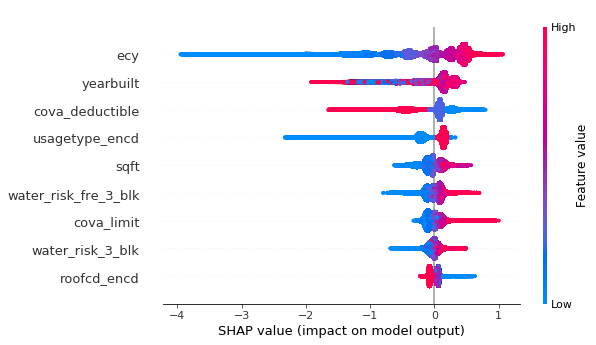

In [59]:
#shap.summary_plot(shap_values, X)

In [18]:
Model = 'wc_Poisson_f_ecy_XGB'

In [19]:
for i in range(0,kfold):
    dataset_shap_values = pd.DataFrame()
    ModelName=Model+"_%s"%i
    xgb_model_file='%s%s.model'%(ModelsDir,ModelName)
    print('Processing model %s, fold %s...'%(Model,i))
    xgb_model = pickle.load(open(xgb_model_file, 'rb'))
    explainer = shap.TreeExplainer(xgb_model)
    #dataset explaining
    shap_values = explainer.shap_values(DX)
    df_shap_values = pd.DataFrame(data=shap_values,   columns=featureset_shap)
    df_shap_values['original_output_value'] = df_shap_values.sum(axis=1)
    df_shap_values['expected_value'] = explainer.expected_value
    df_shap_values['output_value'] = df_shap_values['expected_value'] + df_shap_values['original_output_value']
    df_shap_values['modeldata_id'] = dataset['modeldata_id']
    df_shap_values['cal_year'] = dataset['cal_year']
    df_shap_values['ModelName'] = Model
    df_shap_values['fold'] = i
    for f in featureset:
        df_shap_values[f] = dataset[f]
    df_shap_values = df_shap_values[['ModelName','fold','idf','cal_year']+featureset_shap+['original_output_value','expected_value','output_value']+featureset]
    dataset_shap_values = dataset_shap_values.append(df_shap_values)      
    #Saving 
    dataset_shap_values.to_csv('%sfrequency_shap_values_%s.csv'%(DataDir,ModelName),header=True,index=False)

Processing model wc_Poisson_f_ecy_XGB, fold 0...


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Processing model wc_Poisson_f_ecy_XGB, fold 1...
